<a href="https://colab.research.google.com/github/FDS116/TMAc/blob/main/TMAc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library loading and data reading

In [1]:
#Data reading
import pandas as pd
#Data partition
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
import numpy as np
#Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
#MLR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#SVR
from sklearn.svm import SVR
#Graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import linregress
#Excel
from pandas import ExcelWriter

In [ ]:
#Data reding
Datos=pd.read_csv("/content/drive/MyDrive/phyton/Articulo_Dr_gas (1).csv")

In [ ]:
pd.set_option("display.max_rows", None)
Datos

In [ ]:
Datos.info()

In [ ]:
#Obtain variables
X=Datos.iloc[:,4:53]
y=Datos.iloc[:-3, 2]

In [ ]:
#Obtener Dummy variables
Dummies=pd.get_dummies(X[["Correction 1", "Correction 2","Correction 3","Correction 4"]])
Dummies.head(2)

,Correction 1_0,Correction 1_meta,Correction 1_ortho,Correction 1_para,Correction 2_0,Correction 2_meta,Correction 2_ortho,Correction 2_para,Correction 3_0,Correction 3_meta,Correction 3_ortho,Correction 3_para,Correction 4_0,Correction 4_meta,Correction 4_ortho
0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
#Eliminate categorical variables
X=X.drop(["Correction 1", "Correction 2","Correction 3","Correction 4"], axis=1)
X.head()

,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),CB-(CO)(CB)2,CB-(O)(CB)2,C-(CO)(C)3,C-(H)(CO)(C)2,...,O-(H)(C),C-(H)2(CO)2,C-(H)(O)(CO)(C),C-(H)(CO)(C)(CB),CBF-(CBF)(CB)2,rsc,radical 1,radical 2,radical 3,radical 4
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,4,0,0,0
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2,6,0,0


In [ ]:
#Concatenating dummy variables with predictor variables
Predictors=pd.concat([X,Dummies], axis=1)
Predictors.head()

,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),CB-(CO)(CB)2,CB-(O)(CB)2,C-(CO)(C)3,C-(H)(CO)(C)2,...,Correction 2_meta,Correction 2_ortho,Correction 2_para,Correction 3_0,Correction 3_meta,Correction 3_ortho,Correction 3_para,Correction 4_0,Correction 4_meta,Correction 4_ortho
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
TMAc=Predictors.iloc[:-3,:]
Isomers=Predictors.iloc[55:,:]

# Multiple Linear Regression

In [ ]:
#Divide the set into training and test
X_train, X_test, y_train, y_test = train_test_split(TMAc, y, test_size=0.3, random_state=98)

In [ ]:
#MLR
modelo_mlr=LinearRegression().fit(X_train, y_train)
print(modelo_mlr.score(X_train,y_train))
print(modelo_mlr.score(X_test,y_test))

In [ ]:
#Results prediction
y_predict_train=modelo_mlr.predict(X_train)
y_predict_test=modelo_mlr.predict(X_test)
y_pred_hermanos=modelo_mlr.predict(Isomers)
print(np.round(y_pred_hermanos,1))

In [ ]:
#Comparison of test results
Comparison=pd.DataFrame(data=list(zip(y_test,y_predict_test.round(1))), columns=["Test", "Predict"])
print(Comparison)
Comparison=Comparison[["Test","Predict"]]
writer = ExcelWriter('Benson.xlsx')
Comparison.to_excel(writer, 'Hoja de datos', index=False)
writer.save()

In [ ]:
#Comparison of train results
Comparison_train=pd.DataFrame(data=list(zip(y_train,y_predict_train.round(1))), columns=["Train", "Predict"])
print(Comparison_train)
Comparison_train=Comparison_train[["Train","Predict"]]
writer = ExcelWriter('Benson_prueba.xlsx')
Comparison_train.to_excel(writer, 'Hoja de datos', index=False)
writer.save()

In [ ]:
#Updated value of Benson's groups
Benson=pd.DataFrame(data=list(zip(TMAc, (modelo_mlr.coef_).round(2))), columns=["Functional group", "Value"])
print(Benson)
Benson= Benson[["Functional group", "Value"]]
writer = ExcelWriter('Grupos Benson.xlsx')
Benson.to_excel(writer, 'Hoja de datos', index=False)
writer.save()

In [ ]:
#Intercept of regression
(modelo_mlr.intercept_).round(2)

In [ ]:
#Graph for the training set
m1,b1,r1,s1,p1=linregress(y_train, y_predict_train)
plt.style.use("bmh")
plt.plot(y_train, m1*y_train+b1, "b--", label="Fit")
plt.plot(y_train,y_predict_train, "ro", markersize=8, label="Training set")
plt.plot(y_train,y_train, "k-", label="Perfect fit")
plt.tick_params(labelsize=15)
plt.xticks(np.arange(300,1150,200))
plt.yticks(np.arange(300,1150,200))
plt.xlim(250, 1150)
plt.ylim(250, 1150)
plt.legend(loc="best", prop={"size":14}, frameon=False)
plt.title("MLR", size=15)
plt.xlabel("Experimental value (kJ mol$^{-1})$", size=15)
plt.ylabel("Predicted value (kJ mol$^{-1})$", size=15)
plt.text(750,450, r"$r^2$: {}".format(round(r1**2,4)), size=15)
plt.show()

In [ ]:
#Graph for the testing set
m2,b2,r2,s2,p2=linregress(y_test, y_predict_test)
plt.style.use("bmh")
plt.plot(y_test, m2*y_test+b2, "b--", label="Fit")
plt.plot(y_test,y_predict_test, "ro", markersize=8, label="Testing set")
plt.plot(y_test,y_test,"k-", label="Perfect fit")
plt.tick_params(labelsize=15)
plt.xticks(np.arange(250,1100,200))
plt.yticks(np.arange(250,1100,200))
plt.xlim(200, 1100)
plt.ylim(200, 1100)
plt.legend(loc="best", prop={"size":15}, frameon=False)
plt.title("MLR", size=15)
plt.xlabel("Experimental value (kJ mol$^{-1}$)", size=15)
plt.ylabel("Predicted value (kJ mol$^{-1}$)", size=15)
plt.text(650,350, r"$r^2$: {}".format(round(r2**2,4)), size=15)
plt.show()

In [ ]:
#Metrics of the MLR's model
print("The R2 value for the training set of the regression is: {}".format(r2_score(y_train,y_predict_train).round(4)))
print("The R2 value for the testing set of the regression is: {}".format(r2_score(y_test,y_predict_test).round(4)))
print("The MAE value for the training set of the regression is: {}".format(mean_absolute_error(y_train,y_predict_train).round(4)))
print("The MAE value for the testing set of the regression is: {}".format(mean_absolute_error(y_test,y_predict_test).round(4)))
print("The RMSE value for the training set of the regression is: {}".format(mean_squared_error(y_train,y_predict_train, squared=False).round(4)))
print("The RMSE value for the training set of the regression is: {}".format(mean_squared_error(y_test,y_predict_test, squared=False).round(4)))

# Ridge Regression

In [ ]:
#Find the best alpha value
R2_train_ridge=[]
R2_test_ridge=[]
Alpha=[]
for i in np.arange(0.1,10.1,0.1):
  modelo_ridge=Ridge(alpha=i).fit(X_train, y_train)
  R2_train_ridge.append(modelo_ridge.score(X_train, y_train))
  R2_test_ridge.append(modelo_ridge.score(X_test,y_test))
  Alpha.append(i)

In [ ]:
#Ridge Regression
modelo_ridge=Ridge(alpha=1.0).fit(X_train, y_train)
print(modelo_ridge.score(X_train, y_train))
print(modelo_ridge.score(X_test, y_test))

In [ ]:
#Results prediction
y_predict_train_ridge=modelo_ridge.predict(X_train)
y_predict_test_ridge=modelo_ridge.predict(X_test)

In [ ]:
#Comparison of results
Results_Ridge=pd.DataFrame(data=list(zip(y_train,y_predict_train_ridge.round(1),y_test,y_predict_test_ridge.round(1))),
                              columns=["train", "Predict train","Test", "Predict test"])
print(Results_Ridge)

#Lasso Regression

In [ ]:
#Find the best Alpha value
R2_train_lasso=[]
R2_test_lasso=[]
Alpha_lasso=[]
for i in np.arange(0.1,10.1,0.1):
  modelo_lasso=Lasso(alpha=i).fit(X_train,y_train)
  R2_train_lasso.append(modelo_lasso.score(X_train,y_train))
  R2_test_lasso.append(modelo_lasso.score(X_test,y_test))
  Alpha_lasso.append(i)

In [ ]:
#Lasso Regression
modelo_lasso=Lasso(alpha=0.5).fit(X_train,y_train)
print(modelo_lasso.score(X_train,y_train))
print(modelo_lasso.score(X_test,y_test))

In [ ]:
#Results prediction
y_predict_train_lasso=modelo_lasso.predict(X_train)
y_predict_test_lasso=modelo_lasso.predict(X_test)

In [ ]:
#Comparison of Results
Resultados_lasso=pd.DataFrame(data=list(zip(y_train,y_predict_train_lasso.round(1),y_test,y_predict_test_lasso.round(1))),
                              columns=["Train","Predcit Train", "Test", "Predic Test"])
print(Resultados_lasso)

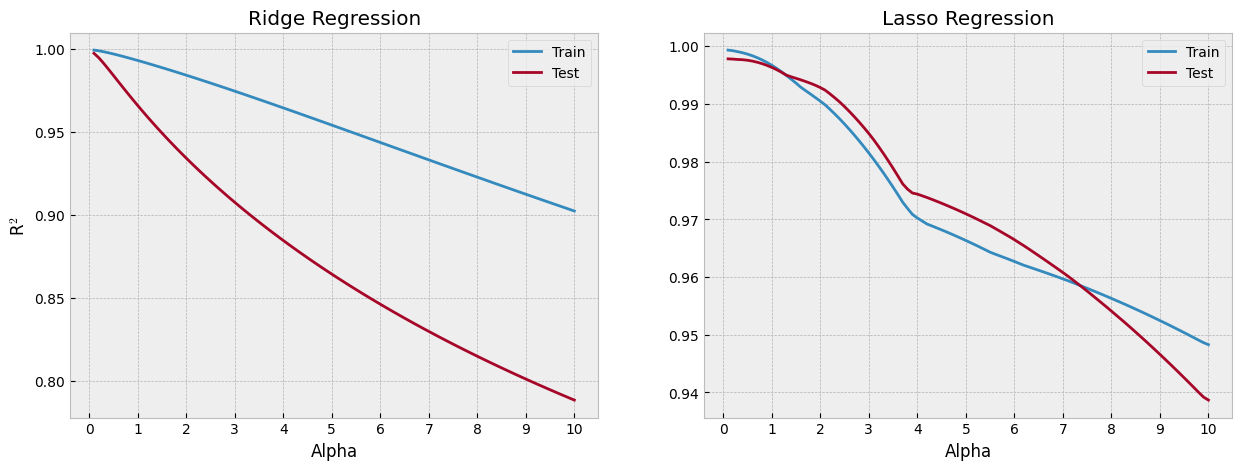

In [ ]:
#Ridge and Lasso model comparison plot
mpl.style.use("bmh")
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
ax0.plot(Alpha, R2_train_ridge, label="Train")
ax0.plot(Alpha, R2_test_ridge, label="Test")
ax0.set_title("Ridge Regression")
ax0.legend(loc="best")
ax0.set_ylabel("R$^2$")
ax0.set_xlabel("Alpha")
ax0.set_xticks(range(11))
ax1.plot(Alpha, R2_train_lasso, label="Train")
ax1.plot(Alpha, R2_test_lasso, label="Test")
ax1.set_title("Lasso Regression")
ax1.legend(loc="best")
ax1.set_xlabel("Alpha")
ax1.set_xticks(range(11))
plt.show()

#SVR

In [ ]:
#Find the best C value
C=[]
R2_train=[]
R2_test=[]
for i in np.arange(800,5000,10):
  modelo_svr=SVR(kernel="linear", C=i).fit(X_train,y_train)
  R2_train.append(modelo_svr.score(X_train,y_train))
  R2_test.append(modelo_svr.score(X_test,y_test))
  C.append(i)

In [ ]:
#Graphic the C value
plt.plot(C,R2_train, label="Train")
plt.plot(C,R2_test, label="Test")
plt.legend(loc="best")
plt.xlabel("C")
plt.ylabel("R$^2$")
plt.show()

In [ ]:
#SVR
modelo_svr=SVR(kernel="linear", C=2000).fit(X_train,y_train)
print(modelo_svr.score(X_train, y_train))
print(modelo_svr.score(X_test,y_test))

In [ ]:
#Results prediction
y_predict_train_svr=modelo_svr.predict(X_train)
y_predict_test_svr=modelo_svr.predict(X_test)
y_predict_hermanos_svr=modelo_svr.predict(Isomers)
print(np.round(y_predict_hermanos_svr))

In [ ]:
#Comparison of test results
Comparison_svr=pd.DataFrame(data=list(zip(y_test,(y_predict_test_svr).round(1))),columns=["Tranin", "Predict"])
Comparison_svr

In [ ]:
#Graph for the training set
m1,b1,r1,s1,p1=linregress(y_train, y_predict_train_svr)
plt.style.use("bmh")
plt.plot(y_train, m1*y_train+b1, "b--", label="Fit")
plt.plot(y_train,y_predict_train_svr, "ro", markersize=8, label="Training set")
plt.plot(y_train,y_train, "k-", label="Perfect fit")
plt.tick_params(labelsize=15)
plt.xticks(np.arange(300,1150,200))
plt.yticks(np.arange(300,1150,200))
plt.xlim(250, 1150)
plt.ylim(250, 1150)
plt.legend(loc="best", prop={"size":14}, frameon=False)
plt.title("SVR", size=15)
plt.xlabel("Experimental value (kJ mol$^{-1})$", size=15)
plt.ylabel("Predicted value (kJ mol$^{-1})$", size=15)
plt.text(750,450, r"$r^2$: {}".format(round(r1**2,4)), size=15)
plt.show()

In [ ]:
#Graph for the testing set 
m2,b2,r2,s2,p2=linregress(y_test, y_predict_test_svr)
plt.style.use("bmh")
plt.plot(y_test, m2*y_test+b2, "b--", label="Fit")
plt.plot(y_test,y_predict_test_svr, "ro", markersize=8, label="Testing set")
plt.plot(y_test,y_test,"k-", label="Perfect fit")
plt.tick_params(labelsize=15)
plt.xticks(np.arange(250,1100,200))
plt.yticks(np.arange(250,1100,200))
plt.xlim(200, 1100)
plt.ylim(200, 1100)
plt.legend(loc="best", prop={"size":15}, frameon=False)
plt.title("SVR", size=15)
plt.xlabel("Experimental value (kJ mol$^{-1}$)", size=15)
plt.ylabel("Predicted value (kJ mol$^{-1}$)", size=15)
plt.text(650,350, r"$r^2$: {}".format(round(r2**2,4)), size=15)
plt.show()

In [ ]:
#Metrics of the SVR
print("The R2 value for the SVR regression in the training set is: {}".format(r2_score(y_train,y_predict_train_svr).round(4)))
print("The R2 value for the SVR regression in the testing set is: {}".format(r2_score(y_test,y_predict_test_svr).round(4)))
print("The MAE value for the SVR regression in the training set is: {}".format(mean_absolute_error(y_train,y_predict_train_svr).round(4)))
print("The MAE value for the SVR regression in the testing set is: {}".format(mean_absolute_error(y_test, y_predict_test_svr).round(4)))
print("The RMSE value for the SVR regression in the training set is: {}".format(mean_squared_error(y_train,y_predict_train_svr,squared=False).round(4)))
print("The RMSE value for the SVR regression in the testing set is: {}".format(mean_squared_error(y_test,y_predict_test_svr,squared=False).round(4)))